<a href="https://colab.research.google.com/github/moaadouhmad99-ops/DI_Bootcamp/blob/main/Week4/Day2/Ex_XP_W4_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1 : Visualizing the Distribution of CGPA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv('Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


histogram of the CGPA categories

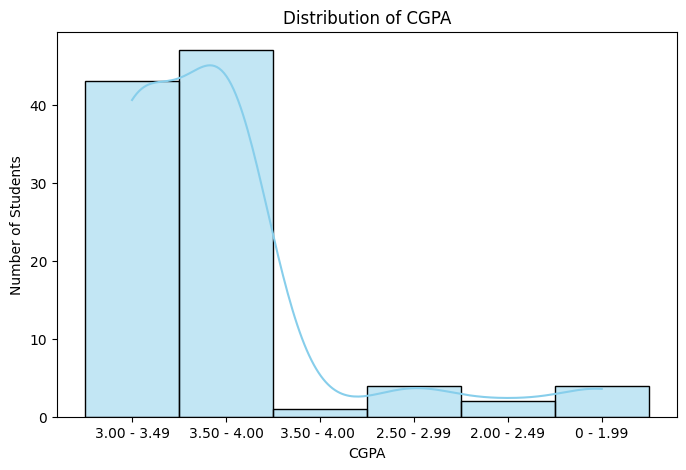

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(data = df, x='What is your CGPA?', bins=10, kde=True, color='skyblue')
plt.xlabel('CGPA')
plt.ylabel('Number of Students')
plt.title('Distribution of CGPA')
plt.show()

# **Exercise 2: Comparing Anxiety Levels Across Different Genders**

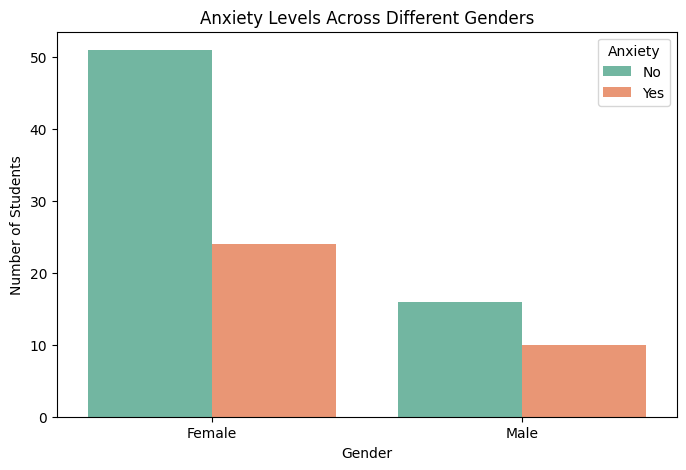

In [4]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x='Choose your gender',
    hue='Do you have Anxiety?',
    palette='Set2'   # customize color palette
)

plt.title("Anxiety Levels Across Different Genders")
plt.xlabel("Gender")
plt.ylabel("Number of Students")

plt.legend(title="Anxiety")

plt.show()

# **Exercise 3: Exploring the Relationship Between Age and Panic Attacks**

Text(0, 0.5, 'Panic Attacks')

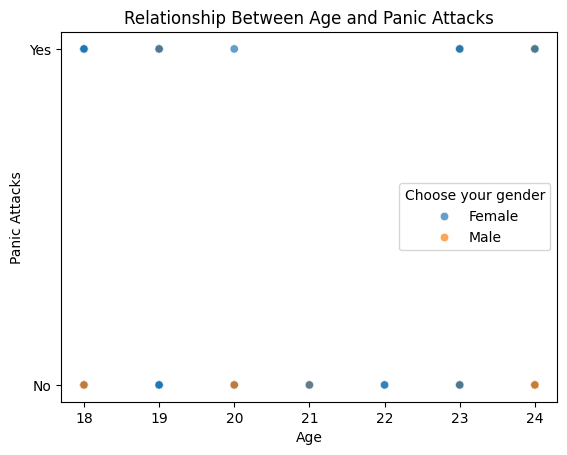

In [5]:
sns.scatterplot(
    data=df,
    x='Age',
    y='Do you have Panic attack?',
    hue='Choose your gender',
    alpha=0.7
)

plt.title("Relationship Between Age and Panic Attacks")
plt.xlabel("Age")
plt.ylabel("Panic Attacks")

# **Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot**

<Figure size 1400x1200 with 0 Axes>

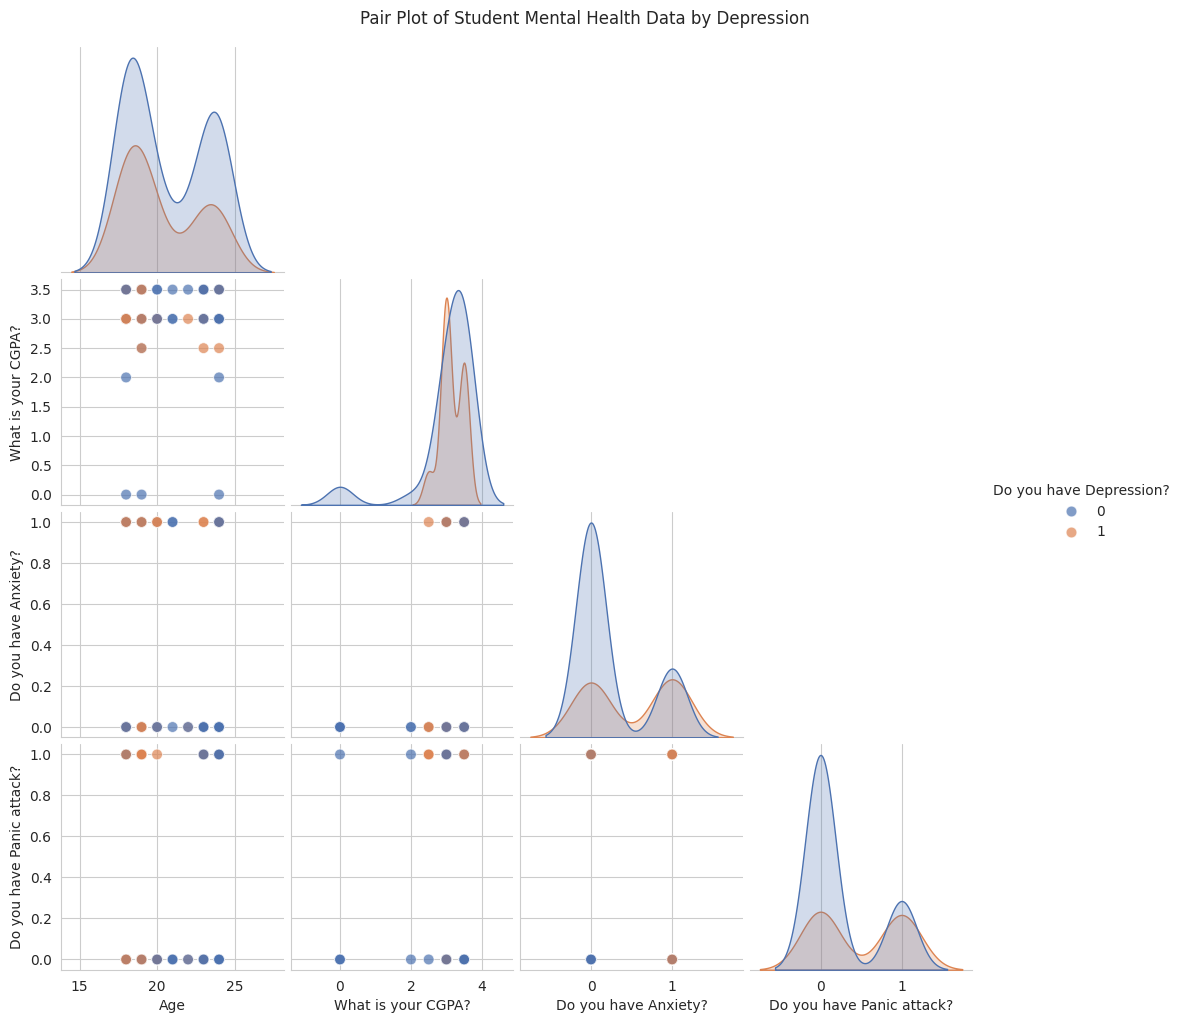

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better-looking plots
sns.set_style("whitegrid")

# Clean CGPA: remove extra spaces and take only the first value in ranges
#df['CGPA'] = df['CGPA'].str.strip()
#df['CGPA'] = df['CGPA'].str.split('-').str[0].str.split(' ').str[0]
#df['CGPA'] = df['CGPA'].astype(float)
# Convertir en string pour éviter l'erreur
df['What is your CGPA?'] = df['What is your CGPA?'].astype(str)

# Nettoyage : enlever espaces + prendre première valeur en cas de range ou texte
df['What is your CGPA?'] = (
    df['What is your CGPA?']
    .str.strip()                     # remove extra spaces
    .str.split('-').str[0]           # keep first part of ranges like "3.2 - 3.5"
    .str.split(' ').str[0]           # keep only first token if extra words
)

# Convertir enfin en float
df['What is your CGPA?'] = pd.to_numeric(df['What is your CGPA?'], errors='coerce')


# Convert Yes/No columns to binary (1 = Yes, 0 = No) for better visualization
binary_cols = ['Do you have Depression?',	'Do you have Anxiety?',	'Do you have Panic attack?']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Select relevant columns
subset = df[['Age', 'What is your CGPA?', 'Do you have Depression?',	'Do you have Anxiety?',	'Do you have Panic attack?']].copy()

# === Create the Pair Plot with Hue ===
# Option 1: Hue by Depression (most common choice)
plt.figure(figsize=(14, 12))
g = sns.pairplot(
    subset,
    hue='Do you have Depression?',
    diag_kind='kde',                    # Kernel density on diagonal
    kind='scatter',                     # Scatter plots off-diagonal
    plot_kws={'alpha': 0.7, 's': 60},   # Transparency and point size
    diag_kws={'fill': True},            # Fill KDE plots
    palette={0: '#4c72b0', 1: '#dd8452'},  # Blue for No, Orange for Yes
    corner=True,                         # Show only lower triangle of plots
    height=2.5,                         # Height of each facet
    aspect=1                            # Aspect ratio of each facet
)
plt.suptitle('Pair Plot of Student Mental Health Data by Depression', y=1.02) # Add a title to the figure
plt.show()

# **Exercise 5: Creating a Heatmap to Visualize Correlations**

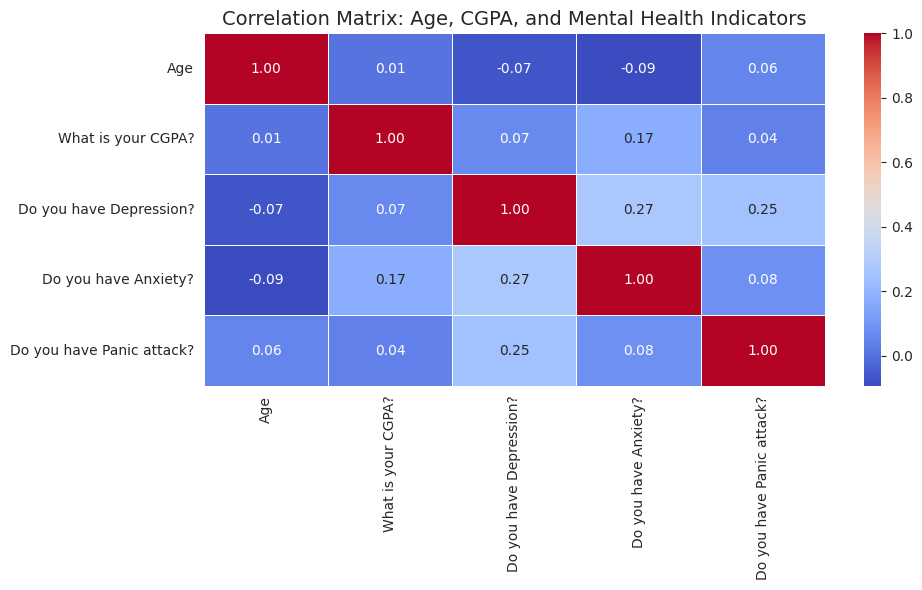

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns (adapt names if needed)
cols = [
    'Age',
    'What is your CGPA?',
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?'
]

# Subset the dataset
df_corr = df[cols]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    cmap='coolwarm',     # color palette
    fmt=".2f",           # format numbers
    linewidths=0.5        # lines between cells
)

plt.title("Correlation Matrix: Age, CGPA, and Mental Health Indicators", fontsize=14)
plt.tight_layout()
plt.show()


# **Exercise 6: Analyzing Distributions and Relationships Using FacetGrid**

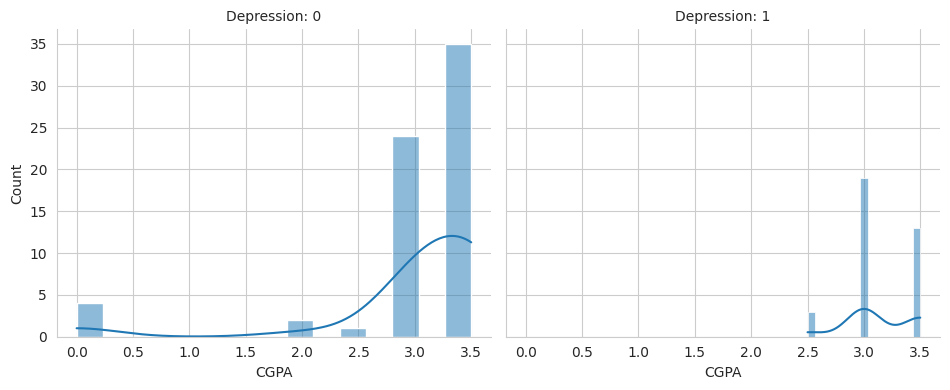

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid segmented by depression status
g = sns.FacetGrid(df, col="Do you have Depression?", height=4, aspect=1.2)

# Map a histogram of CGPA to each facet
g.map_dataframe(sns.histplot, x="What is your CGPA?", kde=True, bins=15)

# Add axis labels and adjust layout
g.set_axis_labels("CGPA", "Count")

# Add better titles
g.set_titles(col_template="Depression: {col_name}")

plt.tight_layout()
plt.show()
